# CENSO DA EDUCAÇÃO SUPERIOR - 2019

Criado em 09 de novembro de 2021, por Davidson Santana

In [1]:
#bibliotecas utilizadas neste notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from tqdm.notebook import tqdm_notebook
sns.set_theme()

In [2]:
#caminho local para o arquivo contendo os microdados a serem analisados
url = r"D:\ANÁLISE DE DADOS\BASE-DADOS-BRUTOS\CENSO ESCOLAR SUPERIOR\2019\microdados-tratados-2019.csv"

In [3]:
#criação de dataframe, guardado na variável df
dfGeral = pd.read_csv(url, sep=',')

C:\PROJETOS\amb-virtual-analise-dados\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#exibir as cinco primeiras linhas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
dfGeral.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,NO_CINE_AREA_GERAL,CO_CINE_ROTULO,TP_COR_RACA,TP_SEXO,NU_IDADE,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASCIMENTO,TP_SITUACAO,QT_CARGA_HORARIA_TOTAL,QT_CARGA_HORARIA_INTEG,DT_INGRESSO_CURSO,IN_INGRESSO_VESTIBULAR,IN_INGRESSO_ENEM,IN_INGRESSO_AVALIACAO_SERIADA,IN_INGRESSO_SELECAO_SIMPLIFICA,IN_INGRESSO_OUTRO_TIPO_SELECAO,IN_INGRESSO_VAGA_REMANESC,IN_INGRESSO_DECISAO_JUDICIAL,IN_RESERVA_ETNICO,IN_RESERVA_ENSINO_PUBLICO,IN_RESERVA_RENDA_FAMILIAR,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,TP_MOBILIDADE_ACADEMICA,IN_MATRICULA,IN_CONCLUINTE
0,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,"Negócios, administração e direito",0421D01,Preta,Feminino,27,Brasileira,BRASIL,Não identificado,Cursando,3700,3700,01JAN2017:00:00:00,0,0,0,0,NaN,0,0,NaN,NaN,NaN,1,NaN,1,0
1,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,"Negócios, administração e direito",0421D01,Parda,Masculino,32,Brasileira,BRASIL,Não identificado,Matrícula trancada,3700,960,01JAN2016:00:00:00,0,1,0,0,NaN,0,0,1.0,1.0,0.0,1,NaN,0,0
2,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,"Negócios, administração e direito",0421D01,Parda,Masculino,31,Brasileira,BRASIL,Não identificado,Cursando,3700,2490,01JAN2012:00:00:00,0,1,0,0,NaN,0,0,0.0,1.0,0.0,1,NaN,1,0
3,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,"Negócios, administração e direito",0421D01,Preta,Feminino,31,Brasileira,BRASIL,Não identificado,Desvinculado do curso,3700,0,01JAN2015:00:00:00,0,1,0,0,NaN,0,0,1.0,1.0,0.0,1,NaN,0,0
4,2019,UNIVERSIDADE FEDERAL DE MATO GROSSO,Pública Federal,1,Noturno,Bacharelado,Presencial,Graduação,"Negócios, administração e direito",0421D01,Parda,Masculino,42,Brasileira,BRASIL,Não identificado,Formado,3700,3940,01JAN2013:00:00:00,0,1,0,0,NaN,0,0,1.0,1.0,0.0,1,NaN,1,1


In [5]:
#criar lista com os índices de registros de estudantes que não quiseram declarar sua cor/raça
# NaoQuisDeclarar_idx = dfGeral[dfGeral['TP_COR_RACA'] == 'Aluno não quis declarar cor/raça'].index

#criar lista com os índices de registros de estudantes que não foi possível obter informação sobre sua cor/raça
# NaoDispoeInfo_idx = dfGeral[dfGeral['TP_COR_RACA'] =='Não dispõe da informação (Não resposta)'].index

#criar lista com as listas obtidas anteriormente
# eliminados_idx = NaoQuisDeclarar_idx.append(NaoDispoeInfo_idx)

In [7]:
#remover do dataframe original os registros de estudantes que não declararam ou não foi possível obeter sua cor/raça
# df = dfGeral.drop(eliminados_idx)

## Distribuição dos estudantes do ensino superior brasileiro por raça/cor e sexo.

Independete da raça/cor, a presença de pessoas do sexo feminino é maior que de pessoas 
do sexo masculino, entre estudante do ensino superior no Brasil, aponta dados do Censo Escolar da Educação Superior 2019.

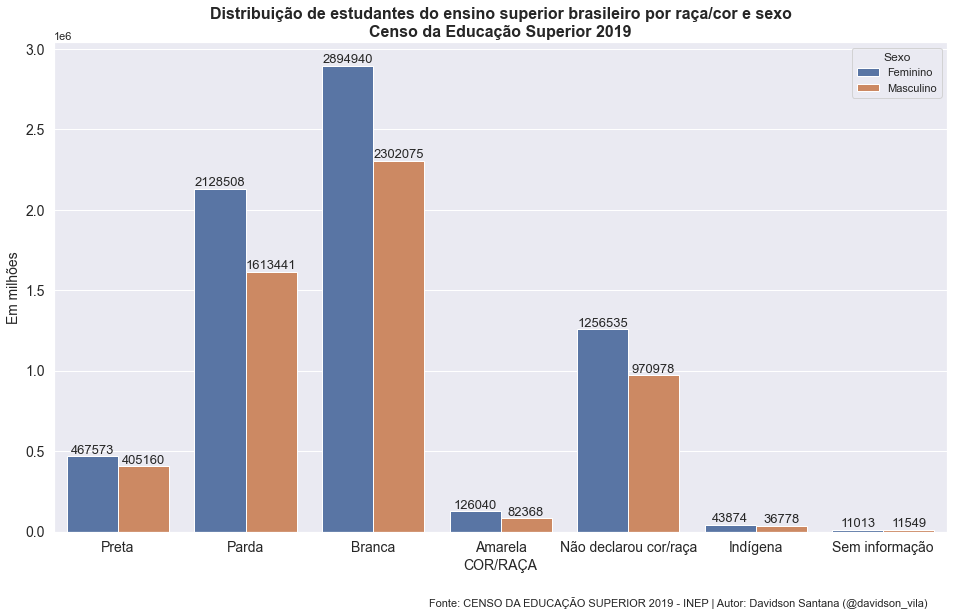

In [85]:
#criar visualização
plt.figure(figsize=(16,9))
ax1 = sns.countplot(x='TP_COR_RACA', hue='TP_SEXO', data=dfGeral)
plt.title('Distribuição de estudantes do ensino superior brasileiro por raça/cor e sexo\nCenso da Educação Superior 2019', 
          fontsize=16, weight='bold')
plt.figtext(0.45, 0.009,'Fonte: CENSO DA EDUCAÇÃO SUPERIOR 2019 - INEP | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('COR/RAÇA', fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Em milhões', fontsize=14)
plt.legend(title='Sexo')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=13)
plt.savefig('./graficos/distr-est-sexo-raca-cor.png', format='png')

## Distribuição de estudantes matriculados no ensino superior brasileiro de acordo com raça/cor.

In [50]:
# função que cria tabela de distribuição de frequências
def TabelaFrequencias(dataframe, coluna):
    variavel, variavel_fn = np.unique(dataframe[coluna], return_counts=True)
    variavel_fr = [round(i, 3) for i in (variavel_fn/variavel_fn.sum())]
    return pd.DataFrame({coluna:variavel, 'fr':variavel_fr})    

Estudantes negros são uma das minorias entre os matriculados em cursos de nível superior. Pessoas negras correspondem a
{{TabFreqCor['fr'][5]*100}}% das matrículas do ensino superior.

In [107]:
# criar tabela de distribuição de frequências de acordo com a cor/raça dos estudantes matriculados
TabFreqCor = TabelaFrequencias(dataframe=dfGeral, coluna='TP_COR_RACA')

TabFreqCor = TabFreqCor.set_index('TP_COR_RACA', drop=True) #definir como índice do dataframe as categorias de cores.

# exibir tabela de distribuição de frequências
TabFreqCor

,fr
TP_COR_RACA,
Amarela,0.017
Branca,0.421
Indígena,0.007
Não declarou cor/raça,0.180
Parda,0.303
Preta,0.071
Sem informação,0.002


<Figure size 1008x648 with 0 Axes>

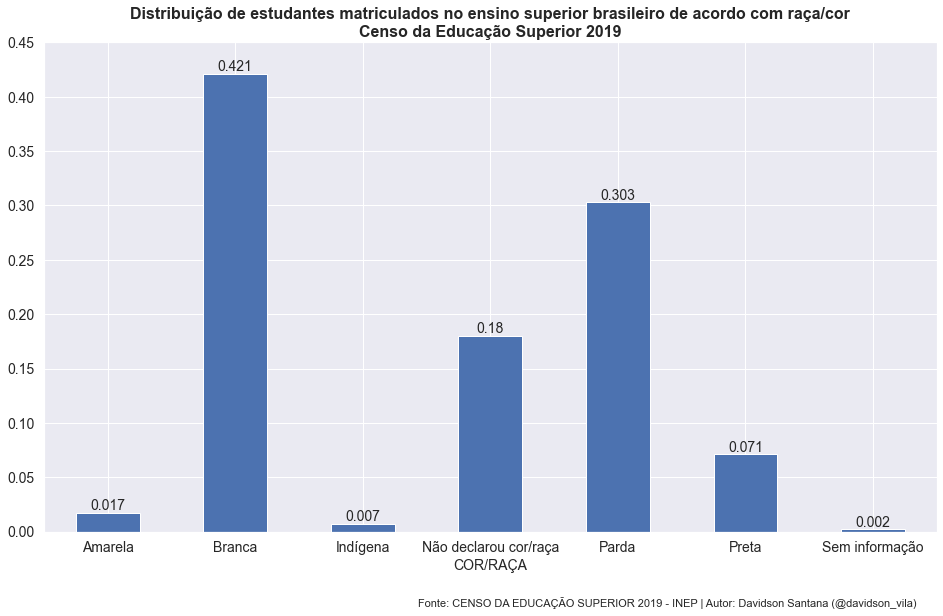

In [109]:
# gerar visualização da tabela de distribuição de frequências, anteriormente apresentada
plt.figure(figsize=(14,9))
ax2 = TabFreqCor.plot.bar(legend=False)
plt.title('Distribuição de estudantes matriculados no ensino superior brasileiro de acordo com raça/cor\nCenso da Educação Superior 2019', 
          fontsize=16, weight='bold')
plt.figtext(0.45, 0.009,'Fonte: CENSO DA EDUCAÇÃO SUPERIOR 2019 - INEP | Autor: Davidson Santana (@davidson_vila)', fontsize=11)
plt.xlabel('COR/RAÇA', fontsize=14)
plt.xticks(rotation='horizontal', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 0.45, 10)
for container in ax2.containers:
    ax2.bar_label(container, fontsize=14)
plt.savefig('./graficos/distr-est-raca-cor.png', format='png')
plt.show()